In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import preprocessing

# **Dataset Import**

In [231]:
train_dataset = "../Train/Final_Train.csv"
dataset = pd.read_csv(train_dataset) 
dataset

,Unnamed: 0,MOFnumber,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,...,metal_type,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio,CO2_working_capacity [mL/g]
0,0,1,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,...,Zn,2,54.0,1.800000,6.666667,21.000000,0.306667,1.044267,0.095238,105.284502
1,1,2,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,...,Ba,2,105.0,1.478873,2.816901,35.000000,0.237113,0.846289,0.000000,101.224774
2,2,3,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,...,Cu,2,47.0,1.566667,6.666667,14.000000,0.195122,0.661463,0.142857,118.987011
3,3,4,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,...,V,4,100.0,1.785714,7.142857,11.500000,0.205357,0.706429,0.000000,187.626004
4,4,5,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,...,Cu,2,47.0,1.678571,7.142857,18.000000,0.276596,0.917447,0.444444,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68608,68608,68609,mof_unit_68609,1188.302573,1001.700216,0.00,0.00000,0.0000,Pr-F,3,...,Zn,2,68.0,1.446809,4.255319,8.000000,0.126050,0.449580,0.250000,-12.943652
68609,68609,68610,mof_unit_68610,1506.660363,1493.296496,0.00,0.01108,0.0000,SO3H,10,...,Ba,2,53.0,1.394737,5.263158,27.000000,0.214286,0.737143,0.000000,-12.985582
68610,68610,68611,mof_unit_68611,2035.532738,1959.518320,0.00,0.00000,0.0000,OPr,4,...,Cr,6,139.0,1.579545,6.818182,10.666667,0.156863,0.539608,0.000000,-13.187635
68611,68611,68612,mof_unit_68612,3985.426053,3638.677280,0.00,0.00000,0.0000,OPr-Me,4,...,Cr,12,256.0,1.600000,7.500000,10.000000,0.164835,0.567033,0.000000,15.672698


# **Cleansing Dataset**

In [232]:
drop_A=dataset.index[dataset["surface_area [m^2/g]"] <= 0].tolist()
drop_B=dataset.index[dataset["void_fraction"] == 0].tolist()
drop_C=dataset.index[dataset["void_volume [cm^3/g]"] == 0].tolist()
drop_D=dataset.index[dataset["CO2/N2_selectivity"] == 0].tolist()
drop_E=dataset.index[dataset["heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]"] == 0].tolist()
drop_F=dataset.index[dataset["CO2_working_capacity [mL/g]"] == 0].tolist()
cleaned_value=drop_A+drop_B+drop_C+drop_D+drop_E+drop_F

# dataset = dataset.drop(68611)
# dataset = dataset.drop(68612)

dataset = dataset.drop(dataset.index[cleaned_value])

# dataset = dataset.dropna(axis='rows')
dataset.shape

(54074, 44)

In [233]:
trainset

,surface_area [m^2/g],void_fraction,void_volume [cm^3/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],PD(Di),PD(Df),PD(Dif),CO2_working_capacity [mL/g]
1,603.61,0.13794,0.1040,7.147286,7.31755,6.28759,7.31755,101.224774
2,788.50,0.14874,0.1262,6.347967,6.73435,4.65130,6.73435,118.987011
3,1441.53,0.21814,0.2220,6.190085,6.32917,5.77752,6.32917,187.626004
5,2430.55,0.37094,0.5725,5.398304,12.20304,11.77350,12.20304,55.786959
6,1530.02,0.33337,0.3662,6.303857,12.00479,10.98421,12.00316,111.690462
...,...,...,...,...,...,...,...,...
66519,1343.62,0.30190,0.2038,4.485481,6.86894,5.52882,6.86894,7.602105
66520,4182.24,0.66340,1.7399,3.605688,19.22726,16.68686,18.97525,2.675231
66521,4149.64,0.57051,1.1246,3.361233,12.90542,9.32427,12.90509,-1.686092
66522,4326.62,0.66963,1.7430,2.781566,13.60306,11.22574,13.60306,-7.546805


Drop Feature

In [234]:
trainset = dataset
trainset = trainset.drop('MOFname',axis=1)
trainset = trainset.drop('MOFnumber',axis=1)
trainset = trainset.drop('Unnamed: 0',axis=1)
trainset = trainset.drop('functional_groups',axis=1)
trainset = trainset.drop('volume [A^3]',axis=1)
trainset = trainset.drop('weight [u]',axis=1)
trainset = trainset.drop('metal_linker',axis=1)
trainset = trainset.drop('organic_linker1',axis=1)
trainset = trainset.drop('organic_linker2',axis=1)
trainset = trainset.drop('CO2/N2_selectivity',axis=1)
trainset = trainset.drop('O',axis=1)
trainset = trainset.drop('C',axis=1)
trainset = trainset.drop('N',axis=1)
trainset = trainset.drop('H',axis=1)
trainset = trainset.drop('P',axis=1)
trainset = trainset.drop('F',axis=1)
trainset = trainset.drop('S',axis=1)
trainset = trainset.drop('Br',axis=1)
trainset = trainset.drop('Cl',axis=1)
trainset = trainset.drop('Cu',axis=1)
trainset = trainset.drop('V',axis=1)
trainset = trainset.drop('Zn',axis=1)
trainset = trainset.drop('Ba',axis=1)
trainset = trainset.drop('Cr',axis=1)
trainset = trainset.drop('Ni',axis=1)
trainset = trainset.drop('I',axis=1)
trainset = trainset.drop('number_of_metal_atom',axis=1)
trainset = trainset.drop('topology',axis=1)
trainset = trainset.drop('metal_type',axis=1)
trainset = trainset.drop('total_degree_of_unsaturation',axis=1)
trainset = trainset.drop('degree_of_unsaturation_per_carbon',axis=1)
trainset = trainset.drop('metallic_percentage',axis=1)
trainset = trainset.drop('oxygen_to_metal_ratio',axis=1)
trainset = trainset.drop('electronegative_atoms_to_total_atoms_ratio',axis=1)
trainset = trainset.drop('weighted_electronegativity_per_atom',axis=1)
trainset = trainset.drop('nitrogen_to_oxygen_ratio',axis=1)


Dummy

In [235]:
# topology = trainset["topology"].values
# trainset["topology"] = topology
# trainset = pd.get_dummies(trainset)
# trainset

In [236]:
trainset

,surface_area [m^2/g],void_fraction,void_volume [cm^3/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],PD(Di),PD(Df),PD(Dif),CO2_working_capacity [mL/g]
1,603.61,0.13794,0.1040,7.147286,7.31755,6.28759,7.31755,101.224774
2,788.50,0.14874,0.1262,6.347967,6.73435,4.65130,6.73435,118.987011
3,1441.53,0.21814,0.2220,6.190085,6.32917,5.77752,6.32917,187.626004
5,2430.55,0.37094,0.5725,5.398304,12.20304,11.77350,12.20304,55.786959
6,1530.02,0.33337,0.3662,6.303857,12.00479,10.98421,12.00316,111.690462
...,...,...,...,...,...,...,...,...
66519,1343.62,0.30190,0.2038,4.485481,6.86894,5.52882,6.86894,7.602105
66520,4182.24,0.66340,1.7399,3.605688,19.22726,16.68686,18.97525,2.675231
66521,4149.64,0.57051,1.1246,3.361233,12.90542,9.32427,12.90509,-1.686092
66522,4326.62,0.66963,1.7430,2.781566,13.60306,11.22574,13.60306,-7.546805


# **Nomalizing Dataset**

In [237]:
def normalize(df):
    result = df.copy()
    for feature in df.columns:
        maxvalue = df[feature].max()
        minvalue = df[feature].min()
        cap = maxvalue - minvalue
        max = maxvalue + (0.1*cap)
        min = minvalue - (0.1*cap)
        result[feature] = (df[feature] - min) / (max - min)
        MaxMin[feature] = [max,min]
    return result

In [238]:
MaxMin = {}
X_normalize = normalize(trainset)
X_normalize

Y = X_normalize["CO2_working_capacity [mL/g]"].values
X_normalize = X_normalize.drop('CO2_working_capacity [mL/g]',axis=1)

In [239]:
MaxMinData = pd.DataFrame(data=MaxMin)
MaxMinData.to_csv("MaxMinData", index=False)

In [240]:
X_normalize

,surface_area [m^2/g],void_fraction,void_volume [cm^3/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],PD(Di),PD(Df),PD(Dif)
1,0.150318,0.194153,0.094504,0.595843,0.159265,0.206984,0.159808
2,0.172184,0.204782,0.097310,0.521830,0.145746,0.141659,0.146298
3,0.249414,0.273085,0.109416,0.507211,0.136354,0.186621,0.136913
5,0.366381,0.423469,0.153708,0.433897,0.272513,0.425999,0.272974
6,0.259880,0.386493,0.127638,0.517746,0.267917,0.394488,0.268344
...,...,...,...,...,...,...,...
66519,0.237835,0.355521,0.107116,0.349374,0.148866,0.176692,0.149416
66520,0.573545,0.711306,0.301230,0.267910,0.435338,0.622156,0.429845
66521,0.569690,0.619884,0.223475,0.245275,0.288794,0.328218,0.289237
66522,0.590620,0.717437,0.301621,0.191601,0.304966,0.404131,0.305404


# **Modeling**

In [241]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [242]:
X = X_normalize
X, Y = X.astype('float'), Y.astype('float')


In [243]:
n_features = X.shape[1]

In [244]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.0001)
print(X_train.shape)
print(X_test.shape)

(54068, 7)
(6, 7)


In [245]:
model = Sequential()
model.add(Dense(64, input_dim=n_features, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_49 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_52 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_53 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_54 (Dense)             (None, 8)                

In [246]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])
history = model.fit(X_train, Y_train, epochs=3000, batch_size=256, verbose=1)

Epoch 1/3000
212/212 [==============================] - 0s 648us/step - loss: 0.0159 - mse: 0.0159
Epoch 2/3000
212/212 [==============================] - 0s 718us/step - loss: 0.0031 - mse: 0.0031
Epoch 3/3000
212/212 [==============================] - 0s 662us/step - loss: 0.0024 - mse: 0.0024
Epoch 4/3000
212/212 [==============================] - 0s 676us/step - loss: 0.0022 - mse: 0.0022
Epoch 5/3000
212/212 [==============================] - 0s 755us/step - loss: 0.0021 - mse: 0.0021
Epoch 6/3000
212/212 [==============================] - 0s 792us/step - loss: 0.0021 - mse: 0.0021
Epoch 7/3000
212/212 [==============================] - 0s 755us/step - loss: 0.0021 - mse: 0.0021
Epoch 8/3000
212/212 [==============================] - 0s 802us/step - loss: 0.0021 - mse: 0.0021
Epoch 9/3000
212/212 [==============================] - 0s 689us/step - loss: 0.0021 - mse: 0.0021
Epoch 10/3000
212/212 [==============================] - 0s 632us/step - loss: 0.0021 - mse: 0.0021
Epoch 11/

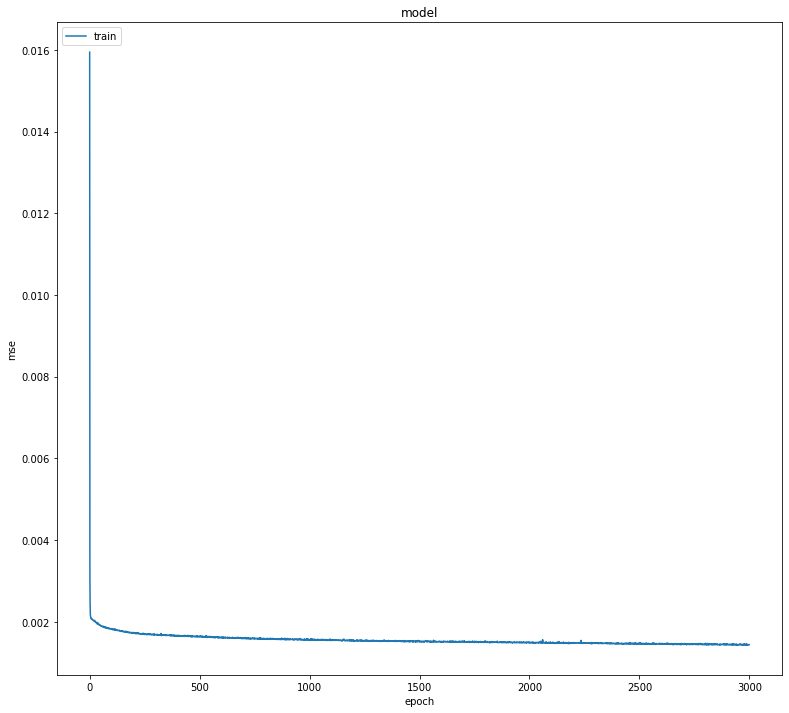

In [247]:
plt.plot(history.history['mse'])
plt.title('model')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams['figure.figsize'] = [13, 12]

plt.show()

In [248]:
Y_pred_test = model.predict(X_test)
Y_pred_train = model.predict(X_train)
error = mean_absolute_error(Y_test, Y_pred_test)
error_train = mean_absolute_error(Y_train, Y_pred_train)
print('MAE: %.3f' % error)
print('MAE_train: %.3f' % error_train)

MAE: 0.015
MAE_train: 0.025


In [249]:
model.save("model.h5")

# **Prediction**

---

**Preprocessing Test set**

In [250]:
def normalize_pred(df):
  result = df.copy()
  for feature in df.columns:
    max = MaxMinData[feature][0]
    min = MaxMinData[feature][1]
    result[feature] = (df[feature] - min) / (max - min)
  return result

In [251]:
dataset_test_path = '../Test/Final_Test.csv'
MaxMinData = pd.read_csv("MaxMinData")

dataset_test = pd.read_csv(dataset_test_path)
# subdata = subdata.drop('MOFname',axis=1)
# subdata["topology_code"] = pd.factorize(subdata.topology)[0]
# subdata["topology_code"] = subdata["topology_code"] + 1
# subdata = subdata.drop('topology',axis=1)
# subdata = normalize(subdata)

# subdata = subdata.drop('topology_code',axis=1)
# subdata = subdata.drop('functional_groups',axis=1)

# title = list(subdata.columns)
# title[10], title[12] = title[12], title[11]
# subdata = subdata[title]

dataset_test

,Unnamed: 0,MOFnumber,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,...,Ni,metal_type,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio
0,0,1,mof_unit_68614,1208.301332,797.70936,586.54,0.11392,0.1039,OEt,2,...,0,Cu,2,51.0,1.593750,6.250000,14.000000,0.190476,0.645714,0.142857
1,1,2,mof_unit_68615,4126.414623,3733.65779,852.49,0.21367,0.1422,H-I,4,...,0,Cr,6,164.0,1.822222,6.666667,8.666667,0.164557,0.566076,0.000000
2,2,3,mof_unit_68616,1602.148373,747.21048,3155.73,0.33883,0.4375,CN-OH,3,...,0,Zn,2,62.0,2.066667,6.666667,10.000000,0.266667,0.877333,0.600000
3,3,4,mof_unit_68617,2436.629312,995.80232,3521.09,0.40464,0.5963,OMe,2,...,0,Cu,2,80.0,1.818182,4.545455,16.000000,0.212766,0.714894,0.250000
4,4,5,mof_unit_68618,3123.418006,1337.53800,2678.46,0.38959,0.5479,NO2-Pr,3,...,0,Zn,2,87.0,2.071429,4.761905,28.000000,0.372881,1.228475,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,16995,16996,mof_unit_85609,32660.944610,4723.68288,5720.14,0.77614,3.2318,OH-NO2,3,...,0,Zn,12,370.0,1.778846,5.769231,12.666667,0.201923,0.686923,0.105263
16996,16996,16997,mof_unit_85610,5070.998617,1499.13262,4017.28,0.59192,1.2058,Me-OMe,3,...,0,Zn,6,89.0,1.679245,11.320755,9.000000,0.217742,0.749032,0.000000
16997,16997,16998,mof_unit_85611,4669.804446,1322.04892,4288.76,0.54950,1.1689,Me-CN,2,...,0,Cu,2,141.0,2.203125,3.125000,8.000000,0.250000,0.788571,2.500000
16998,16998,16999,mof_unit_85612,4682.120862,1213.51148,4331.86,0.60643,1.4091,OH-HCO,3,...,0,Zn,2,101.0,1.870370,3.703704,24.000000,0.250000,0.852308,0.083333


In [252]:
dataset_test = pd.read_csv(dataset_test_path)
dataset_test = dataset_test.drop('MOFname',axis=1)
# dataset_test = dataset_test.drop('topology',axis=1)
dataset_test = dataset_test.drop('MOFnumber',axis=1)
dataset_test = dataset_test.drop('Unnamed: 0',axis=1)
dataset_test = dataset_test.drop('functional_groups',axis=1)
dataset_test = dataset_test.drop('volume [A^3]',axis=1)
dataset_test = dataset_test.drop('weight [u]',axis=1)
dataset_test = dataset_test.drop('metal_linker',axis=1)
dataset_test = dataset_test.drop('organic_linker1',axis=1)
dataset_test = dataset_test.drop('organic_linker2',axis=1)
dataset_test = dataset_test.drop('CO2/N2_selectivity',axis=1)
dataset_test = dataset_test.drop('O',axis=1)
dataset_test = dataset_test.drop('C',axis=1)
dataset_test = dataset_test.drop('N',axis=1)
dataset_test = dataset_test.drop('H',axis=1)
dataset_test = dataset_test.drop('P',axis=1)
dataset_test = dataset_test.drop('F',axis=1)
dataset_test = dataset_test.drop('S',axis=1)
dataset_test = dataset_test.drop('Br',axis=1)
dataset_test = dataset_test.drop('Cl',axis=1)
dataset_test = dataset_test.drop('Cu',axis=1)
dataset_test = dataset_test.drop('V',axis=1)
dataset_test = dataset_test.drop('Zn',axis=1)
dataset_test = dataset_test.drop('Ba',axis=1)
dataset_test = dataset_test.drop('Cr',axis=1)
dataset_test = dataset_test.drop('Ni',axis=1)
dataset_test = dataset_test.drop('I',axis=1)
dataset_test = dataset_test.drop('topology',axis=1)
dataset_test = dataset_test.drop('metal_type',axis=1)
dataset_test = dataset_test.drop('number_of_metal_atom',axis=1)
dataset_test = dataset_test.drop('total_degree_of_unsaturation',axis=1)
dataset_test = dataset_test.drop('degree_of_unsaturation_per_carbon',axis=1)
dataset_test = dataset_test.drop('metallic_percentage',axis=1)
dataset_test = dataset_test.drop('oxygen_to_metal_ratio',axis=1)
dataset_test = dataset_test.drop('electronegative_atoms_to_total_atoms_ratio',axis=1)
dataset_test = dataset_test.drop('weighted_electronegativity_per_atom',axis=1)
dataset_test = dataset_test.drop('nitrogen_to_oxygen_ratio',axis=1)

In [253]:
# topology = dataset_test["topology"].values
# dataset_test["topology"] = topology
# dataset_test = pd.get_dummies(dataset_test)
# dataset_test

In [254]:
dataset_test = normalize_pred(dataset_test)
dataset_test = dataset_test.astype('float')

In [255]:
dataset_test

,surface_area [m^2/g],void_fraction,void_volume [cm^3/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],PD(Di),PD(Df),PD(Dif)
0,0.148299,0.170513,0.094492,0.582727,0.102172,0.107470,0.101263
1,0.179751,0.268686,0.099332,0.408072,0.147102,0.168495,0.141756
2,0.452145,0.391867,0.136648,0.401220,0.143326,0.145004,0.143880
3,0.495354,0.456637,0.156715,0.406853,0.164758,0.187827,0.165297
4,0.395700,0.441825,0.150599,0.423650,0.219271,0.259135,0.219771
...,...,...,...,...,...,...,...
16995,0.755425,0.822263,0.489758,0.225410,0.422590,0.542075,0.422570
16996,0.554036,0.640956,0.233736,0.272835,0.333349,0.334714,0.331550
16997,0.586143,0.599206,0.229073,0.266740,0.325886,0.282163,0.326303
16998,0.591240,0.655236,0.259427,0.253911,0.328923,0.366443,0.329289


Predicting

In [256]:
from keras.models import load_model
import numpy as np

In [257]:
# model = load_model('/content/drive/MyDrive/Colab Notebooks/TMLCC/CleanOutput_1/modelv1.h5')

In [258]:
result = model.predict(dataset_test)
result
with np.printoptions(threshold=np.inf):
    print(result)

[[0.30233923]
 [0.13290493]
 [0.18388322]
 [0.18624333]
 [0.18755722]
 [0.17768824]
 [0.27680272]
 [0.3470816 ]
 [0.1918484 ]
 [0.28500402]
 [0.17221957]
 [0.1894926 ]
 [0.31513503]
 [0.38754386]
 [0.23026209]
 [0.23618184]
 [0.18291803]
 [0.17635918]
 [0.2264995 ]
 [0.19620904]
 [0.30662704]
 [0.24954581]
 [0.22522117]
 [0.24939546]
 [0.31354386]
 [0.22629187]
 [0.24892558]
 [0.38166404]
 [0.18935692]
 [0.18467537]
 [0.22542773]
 [0.22056834]
 [0.46091282]
 [0.21916883]
 [0.3019086 ]
 [0.20262605]
 [0.3525618 ]
 [0.20702001]
 [0.21542677]
 [0.28018868]
 [0.23996536]
 [0.20199776]
 [0.2735086 ]
 [0.32731873]
 [0.18636763]
 [0.20588645]
 [0.41893595]
 [0.28920555]
 [0.18074718]
 [0.1949985 ]
 [0.19252539]
 [0.20956591]
 [0.35081226]
 [0.20926514]
 [0.43577617]
 [0.21213843]
 [0.36080372]
 [0.2340852 ]
 [0.18757306]
 [0.25487608]
 [0.1822611 ]
 [0.21996684]
 [0.3023284 ]
 [0.24399835]
 [0.31094694]
 [0.18904287]
 [0.20318034]
 [0.20310542]
 [0.20979767]
 [0.24411677]
 [0.25386816]
 [0.19

Denormalization

In [259]:
def denormalization(input):
    result = []
    cap = MaxMinData['CO2_working_capacity [mL/g]'][0] - MaxMinData['CO2_working_capacity [mL/g]'][1]
    for i in range(len(input)):
        result.append(((input[i][0]*cap) + MaxMinData['CO2_working_capacity [mL/g]'][1]))
    return result

In [260]:
result = denormalization(result)
result

[176.77424148420454,
 22.52024173979632,
 68.9311815916219,
 71.07983583755528,
 72.27601373103526,
 63.29123551818098,
 153.52565168809843,
 217.50796916744338,
 76.18272687836655,
 160.99216550184747,
 58.31252861823798,
 74.03799323727374,
 188.42362011357346,
 254.34504975453336,
 111.15477981261164,
 116.54415989502824,
 68.05246416137739,
 62.08124732806526,
 107.72929716877816,
 80.15268521520271,
 180.67788869141827,
 128.71080060732976,
 106.56550157202666,
 128.57391859057634,
 186.9750041063425,
 107.54026703781268,
 128.14613854753532,
 248.99202683811274,
 73.91447383563455,
 69.6523558245862,
 106.75355494330869,
 102.32953901472466,
 321.14059791556144,
 101.05541027206085,
 176.38220813235722,
 85.99476627869568,
 222.49717623398374,
 89.99505843014636,
 97.6486217232805,
 156.6082509847127,
 119.98870291879616,
 85.42276495516846,
 150.52667387327483,
 199.51573021130753,
 71.193004299771,
 88.96305756013017,
 282.9246039775417,
 164.81726495118187,
 66.07611303683,
 7

In [261]:
formatter = {"CO2_working_capacity [mL/g]":[],"id":[]}
for i in range(68614,85614):
    formatter['CO2_working_capacity [mL/g]'].append(result[i-68614])
    formatter['id'].append(str(i))

In [262]:
df_submission = pd.DataFrame(data=formatter)
id = df_submission['id'].values
output = df_submission['CO2_working_capacity [mL/g]'].values
submission = pd.DataFrame({"id": id,"CO2_working_capacity [mL/g]": output})

In [263]:
submission

,id,CO2_working_capacity [mL/g]
0,68614,176.774241
1,68615,22.520242
2,68616,68.931182
3,68617,71.079836
4,68618,72.276014
...,...,...
16995,85609,-7.633401
16996,85610,0.885666
16997,85611,1.416772
16998,85612,-1.011948


In [264]:
submission.to_csv("submission2.csv", index=False)
!zip submission_07102021_6.zip submission.csv

'zip' is not recognized as an internal or external command,
operable program or batch file.
